# Loading libraries

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading data and displaying key stats

In [2]:
#Load Data
leudata = pd.read_csv('./leuanalysisNew.csv')
leudata.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,REMISS
0,0.8,0.83,0.66,1.9,1.10,1.00,1
1,0.9,0.36,0.32,1.4,0.74,0.99,1
2,0.8,0.88,0.70,0.8,0.18,0.98,0
3,1.0,0.87,0.87,0.7,1.05,0.99,0
4,0.9,0.75,0.68,1.3,0.52,0.98,1


## Key statistics using .describe()

In [3]:
#Key statistics
leudata.describe().T

,count,mean,std,min,25%,50%,75%,max
CELL,27.0,0.881481,0.186645,0.20,0.825,0.95,1.000,1.00
SMEAR,27.0,0.635185,0.214052,0.32,0.430,0.65,0.835,0.97
INFIL,27.0,0.570741,0.237567,0.08,0.335,0.63,0.740,0.92
LI,27.0,1.003704,0.467795,0.40,0.650,0.90,1.250,1.90
BLAST,27.0,0.688519,0.534960,0.00,0.230,0.52,1.060,2.06
TEMP,27.0,0.997407,0.014830,0.98,0.990,0.99,1.005,1.04
REMISS,27.0,0.333333,0.480384,0.00,0.000,0.00,1.000,1.00


## Boxplots

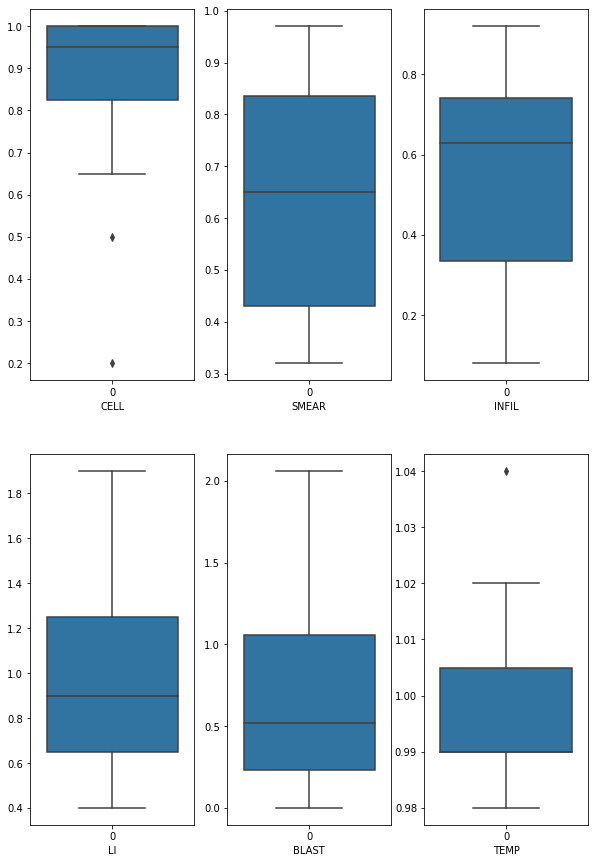

In [4]:
#Boxplots for independent variables
plt.figure(figsize=(10,15))
cnt = 1

for col in leudata.columns:
    if (col == 'REMISS'):
        continue
  
    plt.subplot(2, 3, cnt)
    bp = sns.boxplot(data=leudata[col])
    bp.set_xlabel(col)
    cnt += 1    

# Machine Learning modeling

In [5]:
#Create x and y variables
X = leudata.drop('REMISS',axis=1).to_numpy()
y = leudata['REMISS'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

## Script for Neural Network and displaying metrics

In [6]:
#Script for Neural Network
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(6,4,2), max_iter=10000, random_state=100)  
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['No remission','Remission']
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions,target_names=target_names)) 

[[3 1]
 [1 1]]
              precision    recall  f1-score   support

No remission       0.75      0.75      0.75         4
   Remission       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6

